In [1]:
# August 8 2017
# This file is for experiments with student2 5 skills and training trajectory length 6,7,8
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def graph_trainauc_score(vloss, scores):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

# Training Trajectory 6

(10, 41)
last 1.34643169057e-06 threshold 0.0001


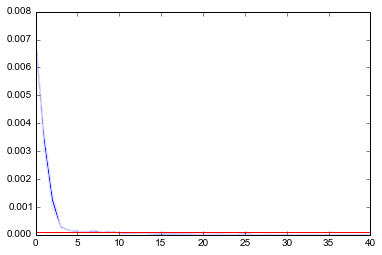

In [7]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.0001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,40],[x_end,x_end],color='#ff0000')
plot([0,40],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
#ylim(0.0000,0.0002)

# looks like epoch 28 is good for 0.00001
# looks like epoch 10 is good for 0.0001

vloss shape (20, 29)
scores shape (20,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


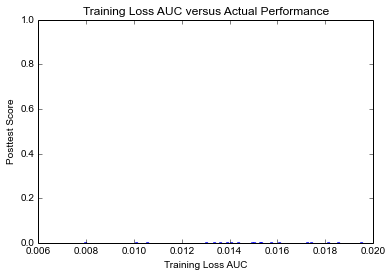

In [2]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts30000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss[:,-1])
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
#six.print_(qvals)

graph_trainauc_score(vloss, scores)

# Training Trajectories Length 7 and 8

(10, 31)
last 4.25936310418e-07 threshold 1e-05


(0.0, 0.0001)

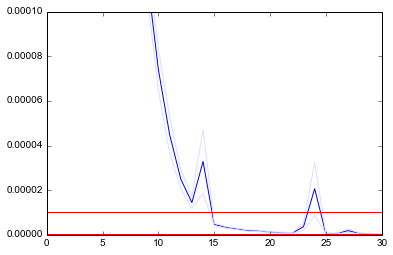

In [4]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,30],[x_end,x_end],color='#ff0000')
plot([0,30],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(0.0000,0.0001)

# looks like epoch 15 is good for 0.00001

(10, 31)
last 1.15557909636e-06 threshold 1e-05


(0.0, 0.0001)

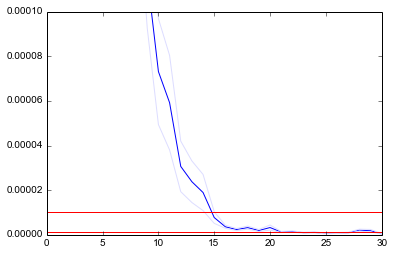

In [5]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,30],[x_end,x_end],color='#ff0000')
plot([0,30],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(0.0000,0.0001)

# looks like epoch 15 is good for 0.00001

vloss shape (20, 16)
scores shape (20,)
[ 1.     0.375  0.     0.     1.     1.     0.125  0.     1.     0.     0.75
  0.     0.5    1.     1.     1.     1.     0.     0.     0.   ]
[  7.24408010e-01   3.05211963e-02   6.99944151e-01   1.77136724e-03
   5.84004810e-01   6.11965526e-01   1.99812452e-01   4.10932904e-01
   3.50446919e-01   2.59724932e-03   2.39833793e-02   2.27420829e-01
   2.81952109e-01   4.84481321e-01   6.86139355e-01   6.53231437e-01
   6.41810657e-01   1.30688141e-01   2.86649182e-04   3.10328132e-01]


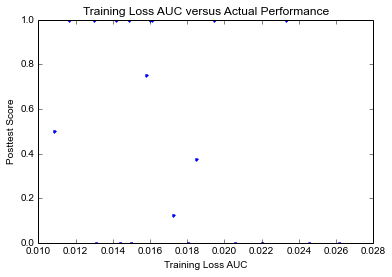

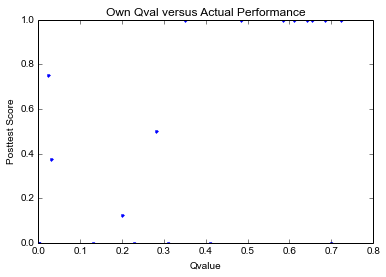

In [6]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts30000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)

vloss shape (20, 16)
scores shape (20,)
[ 1.   1.   1.   1.   0.   1.   1.   0.5  1.   1.   0.   1.   1.   1.   1.
  1.   1.   1.   1.   1. ]


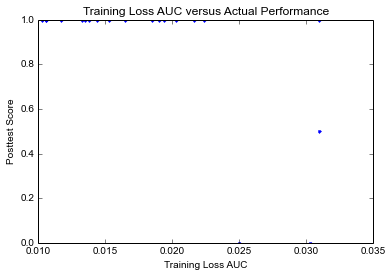

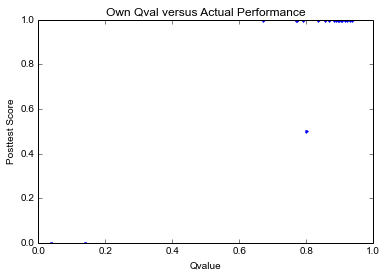

In [7]:
'''
Analyzing results of student2 with 5 skills, with training length 8 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/mcts-rtype2-rollouts30000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)

# Training Trajectories 7 and 8 with BinCE and Tuned Learning Rate

(10, 11)
last 0.680147517443 threshold 0.680157517443


(0.68013751744270323, 0.68016751744270321)

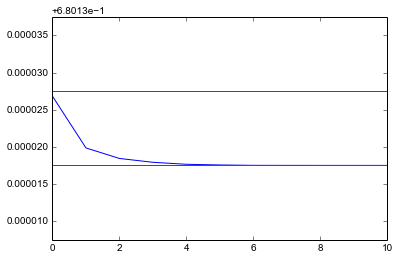

In [8]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runbceA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = x_end + 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,10],[x_end,x_end],color='#ff0000')
plot([0,10],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(x_end - 0.00001, x_end + 0.00002)

# looks like epoch 6 is good for basically everything

(10, 11)
last 0.679796337862 threshold 0.679806337862


(0.6797863378620147, 0.67981633786201467)

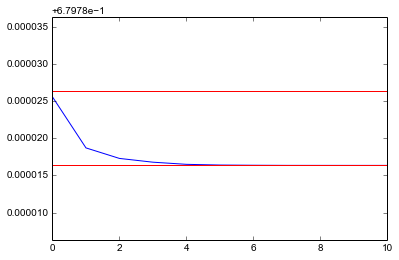

In [12]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runbceA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = x_end + 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,10],[x_end,x_end],color='#ff0000')
plot([0,10],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(x_end - 0.00001, x_end + 0.00002)

# looks like epoch 6 is good for basically everything

In [2]:
# It looks like this completely failed and got all 0s in scores

# Sanity Check Training Trajectory length 9

(5, 11)
last 0.679508080502 threshold 0.679518080502


(0.67949808050155647, 0.67952808050155644)

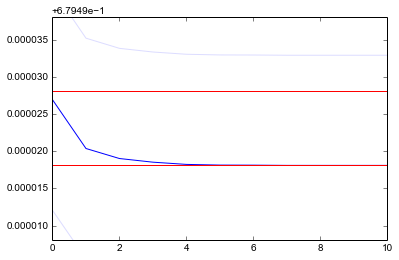

In [3]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l9-random.pickle/stats-runbceA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = x_end + 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,10],[x_end,x_end],color='#ff0000')
plot([0,10],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(x_end - 0.00001, x_end + 0.00002)

# looks like epoch 6 is good for basically everything

# Training Trajectories 7 and 8 with MSE and tuned Learning Rate

(5, 21)
last 3.04473584435e-07 threshold 1.03044735844e-05


(-9.6955264155653263e-06, 2.0304473584434676e-05)

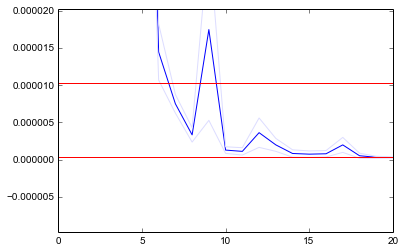

In [4]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = x_end + 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(x_end - 0.00001, x_end + 0.00002)

# looks like epoch 10 is good for basically everything

(5, 21)
last 8.34380212995e-07 threshold 1.0834380213e-05


(-9.1656197870053548e-06, 2.0834380212994648e-05)

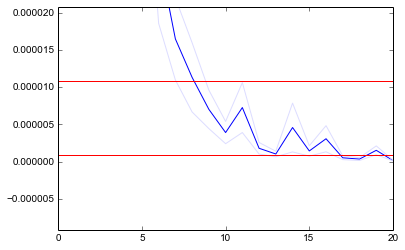

In [7]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = x_end + 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(x_end - 0.00001, x_end + 0.00002)

# looks like epoch 10 is good for basically everything

vloss shape (20, 11)
scores shape (20,)
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


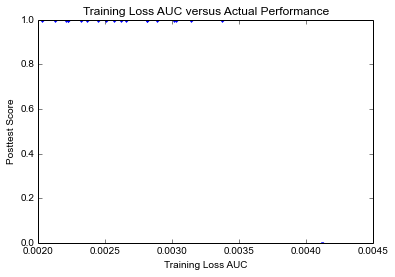

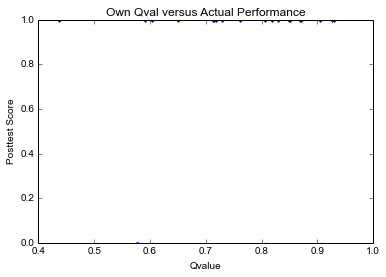

In [3]:
'''
Analyzing results of student2 with 5 skills, with training length 8 and testing length 8.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)
# 19 / 20

vloss shape (50, 11)
scores shape (50,)
[ 1.     1.     1.     1.     1.     1.     0.     0.25   1.     1.     0.
  1.     1.     0.     1.     0.     1.     1.     0.     0.     0.75   0.
  0.     0.     0.     1.     0.     0.     0.     1.     0.     1.     1.
  0.     0.     0.     0.     1.     0.     0.     0.     0.     0.     1.
  0.     0.     1.     0.125  0.     1.   ]


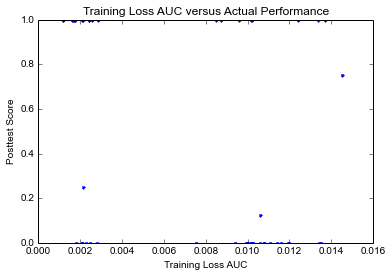

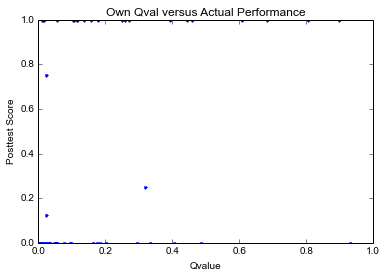

In [2]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runB.npz')
data12 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runC.npz')
data21 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runB.npz')
data22 = np.load('experiments/test2w5_modelsimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runC.npz')

vloss = np.vstack((data11['vloss'],data12['vloss']))
scores = np.vstack((data21['scores'],data22['scores']))[:,0]
qvals = np.vstack((data21['qvals'],data22['qvals']))[:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)
# from the own qvalues, it seems like as a general rule (though not absolute), larger qvals at the end correspond to better policy-models
# 21 / 50

# Small size model

(5, 41)
last 1.34519607244e-05 threshold 0.000113451960724


(-8.6548039275594426e-05, 0.0002134519607244056)

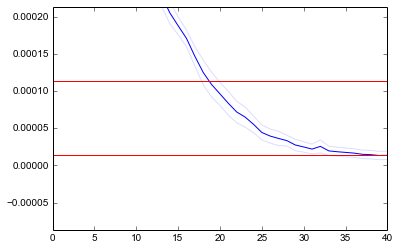

In [7]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelsimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = x_end + 0.0001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,40],[x_end,x_end],color='#ff0000')
plot([0,40],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(x_end - 0.0001, x_end + 0.0002)

# looks like epoch 20 is good for 0.0001
# REDO